Import neccessary library

In [208]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import xlrd
import xlsxwriter
import operator
from nltk.util import ngrams
from collections import Counter
from LongLexTo.LexTo import LexTo

In [2]:
lexto = LexTo()

C:\Program Files (x86)\Java\jre1.8.0_121\bin\client\jvm.dll


Open text file

In [3]:
df = pd.read_excel('pantip.xlsx')

Set header and preview data

In [4]:
df.columns = ['tid', 'year', 'title', 'content', 'comments', 'all_text']
df.head()

,tid,year,title,content,comments,all_text
0,36099631,2017,รู้แล้วล่ะ!ว่าทำไม?พวกโกงคอรัปชั่นเขาถึงไม่กลัว!,นอกจากการดำเนินการตามขบวนการทางกฎหมายจะบ้าช้า...,2 รูปนี้ คุณเห็นอะไรอย่าว่าแต่คอรัปชั่นเลย แม้...,รู้แล้วล่ะ!ว่าทำไม?พวกโกงคอรัปชั่นเขาถึงไม่กลั...
1,36082069,2017,(?_?)...พี่ๆที่เคยเป่านกหวีดเพื่อต้านโกง...พวก...,ตอนนี้พวกพี่กินอิ่ม นอนอุ่น สบายใจเพราะบ้านเมื...,เพิ่งกลับจาก หัวหินอากาสดี๊ดีพรุ่งนี้มีนัด พิธ...,(?_?)...พี่ๆที่เคยเป่านกหวีดเพื่อต้านโกง...พวก...
2,36081379,2017,อยากให้รัฐบาลทหารทำโครงการ เมกะโปรเจก รถไฟฟ้าค...,โครงการรถไฟฟ้าความเร็วสูง กรุงเทพ ไป ภาคเหนือ...,ไปทำเองเลยไหมลงทุน 5-8 แสนล้านขึ้นเหนือล่องใต้...,อยากให้รัฐบาลทหารทำโครงการ เมกะโปรเจก รถไฟฟ้าค...
3,36073711,2017,ต้องเพิ่มโทษ การลงโทษข้าราชการที่ทำผิดให้เด็ดข...,ถ้าทำไม่ได้ ไม่ต้องมาสอย หรือบอกว่าให้เด็กดี...,เอาแค่ทำให้กฏหมายอยู่ในมารตรฐานเดียวกันให้ได้ก...,ต้องเพิ่มโทษ การลงโทษข้าราชการที่ทำผิดให้เด็ดข...
4,36070286,2017,หุ้น bbl เข้าซ์้อได้หรือยัง และถ้าบอกว่าไม่ต้อ...,แต่จะดีในอนาคต ตอนนี้หุ้นกลุ่มแบงค์ถือว่ารับข...,เราต้องมาอวยประเทศไทยกันประเทศไทยต้องเหนือกว่า...,หุ้น bbl เข้าซ์้อได้หรือยัง และถ้าบอกว่าไม่ต้อ...


Load stop words

In [211]:
wb = xlrd.open_workbook('stopwords.xlsx')
ws = wb.sheet_by_index(0)
stopwords = []
for i in range(0, ws.nrows):
    stopwords.append(ws.cell_value(i, 0))

Test word cuts

In [210]:
text = unicode(df['all_text'][1].strip())
text = text.replace(u'\xa0', '')
words, types = lexto.tokenize(text)
word_list = []
for word in words:
    word_list.append(word)
type_list = []
for type in types:
    type_list.append(type)
filter_word_list = []
filter_type_list = []
for i in range(0, len(word_list)):
    if type_list[i] != 'special':
        if word_list[i] not in stopwords:
            filter_word_list.append(word_list[i])
            filter_type_list.append(type_list[i])
print len(filter_word_list)
print '|'.join(filter_word_list)

212
พี่|เป่านกหวีด|ต้าน|โกง|พวก|พี่|สบายดี|ไหม|ครับ|ตอนนี้|พวก|พี่|กิน|อิ่ม|นอน|อุ่น|สบายใจ|บ้านเมือง|สงบ|เรียบร้อย|ดี|ใช่ไหม|ครับ|เรื่อง|ต้าน|โกง|นั่น|มัน|แค่|เสียง|ลม|พัด|ห้วง|มโน|ชั่วขณะหนึ่ง|เท่านั้น|ใช่ไหม|ครับ|ผม|ไม่ได้|ยิน|เสียง|เป่านกหวีด|ต้าน|โกง|นับ|ตอนนั้น|พวก|พี่|บอก|อันดับ|คะแนน|ไม่รู้|พวก|ต่างชาติ|มุ่งร้าย|ประเทศ|เชื่อถือ|ไม่ได้|ไม่ได้|ออกมา|หน่วยราชการ|ตอนนี้|ไม่มี|การโกง|เกิดขึ้น|ชาติ|หรอก|คนดี|ผู้เสียสละ|คอย|ดูแล|พวก|พี่|เชื่อ|ข้อมูล|ทางราชการ|ตอนนี้|เท่านั้น|ใช่|หรือเปล่า|ครับ|ช่วย|ที|เถอะ|ครับ|ช่วย|แถ|ผม|ฟัง|หน่อย|เถอะ|ครับ|ไหน|ผม|ไม่ได้|ฟัง|พวก|พี่|แถ|ผม|นอนไม่หลับ|ต้าน|โกง|ครับ|ผม|ชื่อ|นาย|ต้าน|โกง|ครับ|นะ|ครับ|เพิ่ง|กลับ|หัว|หิน|อา|กา|สดี๊|ดี|พรุ่งนี้|มีนัด|พิธีกร|ชื่อดัง|หน้า|รู้|ใคร|ร้าน|เกียน|เอา|ทีวี|คิด|ดี๊|ดี|ไหม|ละ|ตก|ขบวน|หรือไง|คุย|ไหน|ไหน|เหตุผล|คะแนน|ตก|เหตุผล|ทางการเมือง|สะท้อน|คอรัปชั่น|จริงๆ|กร๊ากก|กก|สะท้อน|คอ|ชั่น|5555555555|มัน|สะท้อน|ฟ|แหละ|ค่ะ|สะท้อน|สิ่ง|ตรวจสอบ|ไม่ได้|55555|ค่อย|สบาย|โดน|รีด|ภาษี|แยอะ|https|pantip|com|topic|35657646|ลิเก|เรื่อ

Test 1-grams

In [8]:
bigrams = ngrams(filter_word_list, 2)
count_bigrams = Counter(bigrams)
m = count_bigrams.most_common()
for c in m[:10]:
    print c[0][0], c[0][1], c[1]

พวก พี่ 5
ต้าน โกง 5
ใช่ไหม ครับ 2
แถ ผม 2
ผม ไม่ได้ 2
เป่านกหวีด ต้าน 2
โกง ครับ 2
เถอะ ครับ 2
ครับ ผม 2
ครับ ช่วย 2


Test 1-grams

In [9]:
unigrams = ngrams(filter_word_list, 1)
count_unigrams = Counter(unigrams)
m = count_unigrams.most_common()
for c in m[:10]:
    print c[0][0], c[1]

ครับ 9
พี่ 6
พวก 6
โกง 6
ไม่ได้ 5
ต้าน 5
ผม 5
ตอนนี้ 4
เรื่อง 4
สะท้อน 4


Put all together, compute each year

In [41]:
for year in range(2013, 2018):
    df2 = df[df['year']==str(year)]
    word_freq = {}
    for i, dr in df2.iterrows():
        if i%100==0:
            print i,
        text = unicode(dr['all_text'])
        text = text.replace(u'\xa0', '')
        words, types = lexto.tokenize(text)
        word_list = []
        for word in words:
            word_list.append(word)
        type_list = []
        for type in types:
            type_list.append(type)
        filter_word_list = []
        filter_type_list = []
        for j in range(0, len(word_list)):
            if type_list[j] != 'special' and len(word_list[j]) > 1 and not word_list[j].isdigit():
                if word_list[j] not in stopwords:
                    filter_word_list.append(word_list[j])
                    filter_type_list.append(type_list[j])
        # print '|'.join(filter_word_list)
        bigrams = ngrams(filter_word_list, 2)
        count_bigrams = Counter(bigrams)
        m = count_bigrams.most_common()
        # print count_unigrams
        for c in m:
            if c[0] in word_freq:
                word_freq[c[0]] += c[1]
            else:
                word_freq[c[0]] = c[1]
    sorted_word_freq = sorted(word_freq.items(), key=operator.itemgetter(1))
    sorted_word_freq = sorted_word_freq[::-1]
    x = []
    y = []
    wb = xlsxwriter.Workbook('bigrams_%d.xlsx'%(year))
    ws = wb.add_worksheet()
    for word in sorted_word_freq:
        x.append(word[0][0]+' '+word[0][1])
        y.append(word[1])
    ws.write(0, 0, 'word')
    ws.write(0, 1, 'count')
    for i in range(0, len(x)):
        ws.write(i+1, 0, x[i])
        ws.write(i+1, 1, y[i])
    wb.close()

0 2700 2800 2900


Summary top 50 of 2013

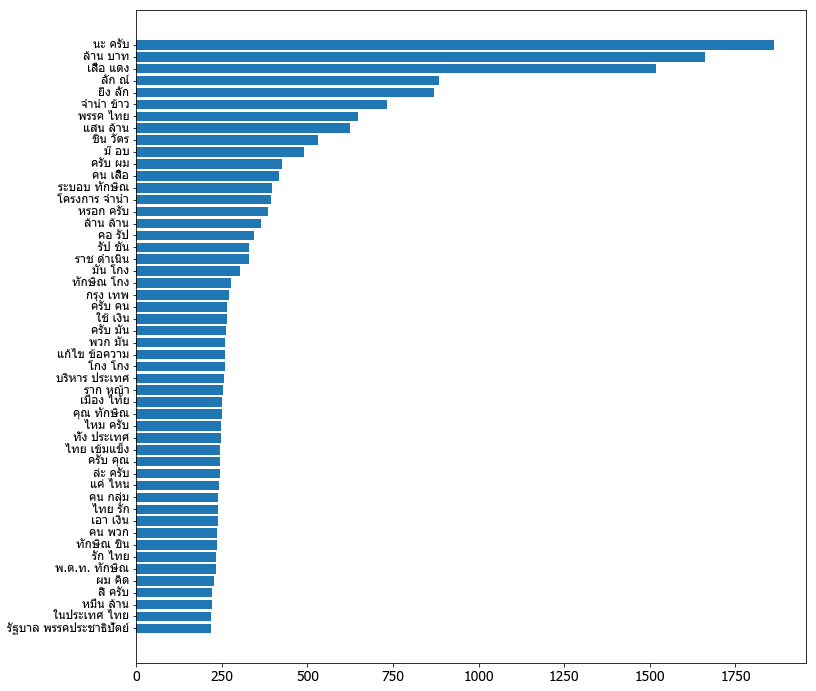

In [202]:
ng = pd.read_excel('C:/Users/chonnakan/Documents/Pantip/clean/bigrams_2013.xlsx')
ng = ng[0:50]
ng = ng[::-1]
matplotlib.rc('font', **{'sans-serif' : 'Tahoma', 'family' : 'sans-serif'})
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
labels = [x for x in ng['word']]
ng1=ax.barh([i for i in range(0, len(ng))], ng['count'], height=.8, align='center')
plt.yticks([i for i in range(0, len(ng))])
ax.set_yticklabels(labels, va='center', minor=False, size=12)
plt.show()

Summary top 50 of 2014

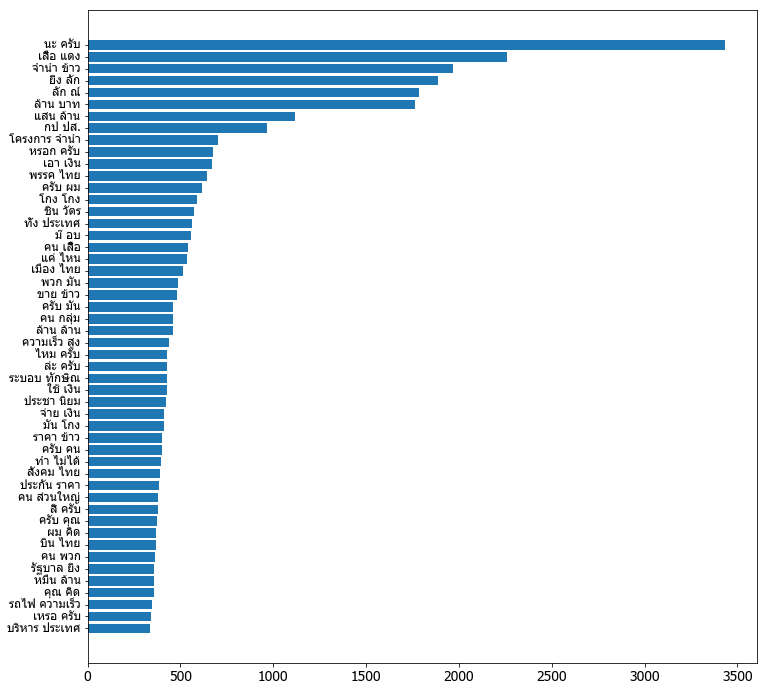

In [203]:
ng = pd.read_excel('C:/Users/chonnakan/Documents/Pantip/clean/bigrams_2014.xlsx')
ng = ng[0:50]
ng = ng[::-1]
matplotlib.rc('font', **{'sans-serif' : 'Tahoma', 'family' : 'sans-serif'})
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
labels = [x for x in ng['word']]
ng1=ax.barh([i for i in range(0, len(ng))], ng['count'], height=.8, align='center')
plt.yticks([i for i in range(0, len(ng))])
ax.set_yticklabels(labels, va='center', minor=False, size=12)
plt.show()

Summary top 50 of 2015

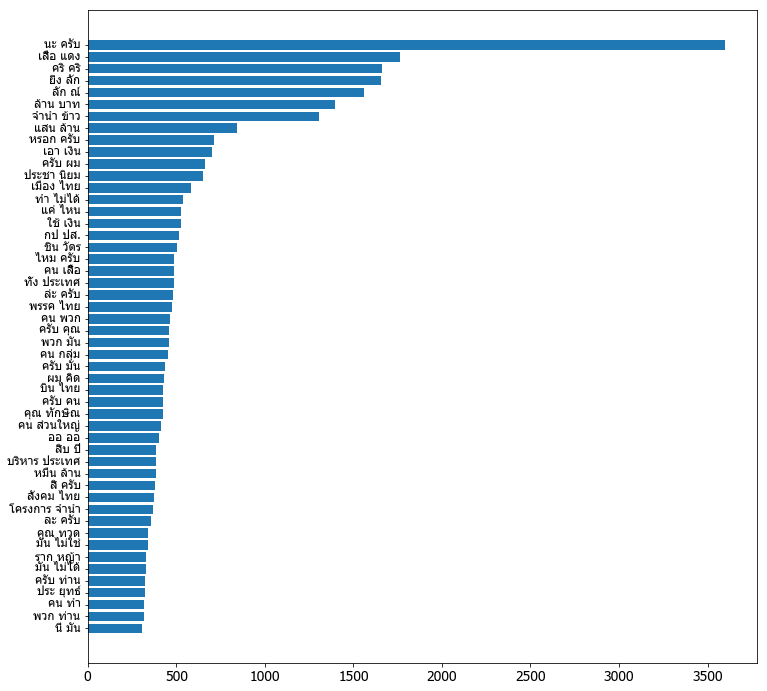

In [204]:
ng = pd.read_excel('C:/Users/chonnakan/Documents/Pantip/clean/bigrams_2015.xlsx')
ng = ng[0:50]
ng = ng[::-1]
matplotlib.rc('font', **{'sans-serif' : 'Tahoma', 'family' : 'sans-serif'})
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
labels = [x for x in ng['word']]
ng1=ax.barh([i for i in range(0, len(ng))], ng['count'], height=.8, align='center')
plt.yticks([i for i in range(0, len(ng))])
ax.set_yticklabels(labels, va='center', minor=False, size=12)
plt.show()

Summary top 50 of 2016

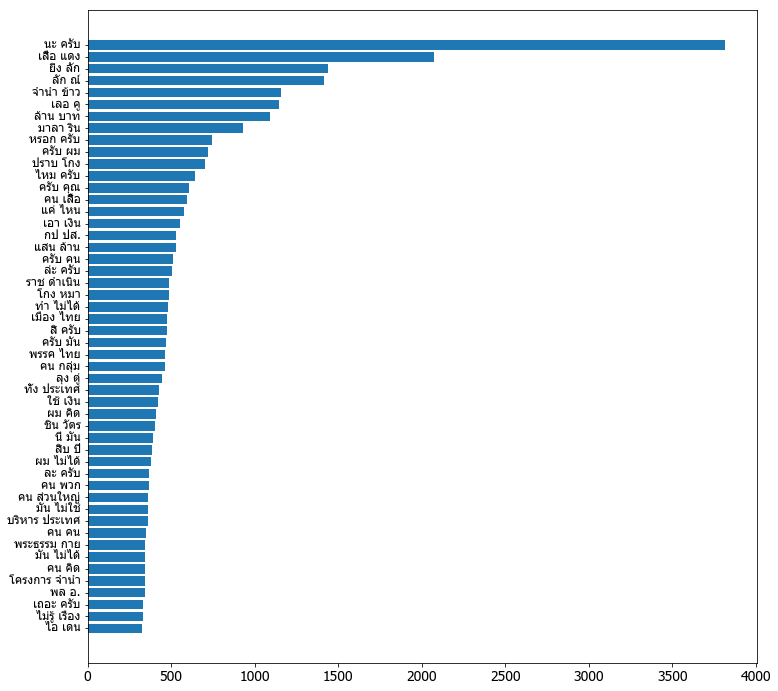

In [205]:
ng = pd.read_excel('C:/Users/chonnakan/Documents/Pantip/clean/bigrams_2016.xlsx')
ng = ng[0:50]
ng = ng[::-1]
matplotlib.rc('font', **{'sans-serif' : 'Tahoma', 'family' : 'sans-serif'})
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
labels = [x for x in ng['word']]
ng1=ax.barh([i for i in range(0, len(ng))], ng['count'], height=.8, align='center')
plt.yticks([i for i in range(0, len(ng))])
ax.set_yticklabels(labels, va='center', minor=False, size=12)
plt.show()

Summary top 50 of 2017

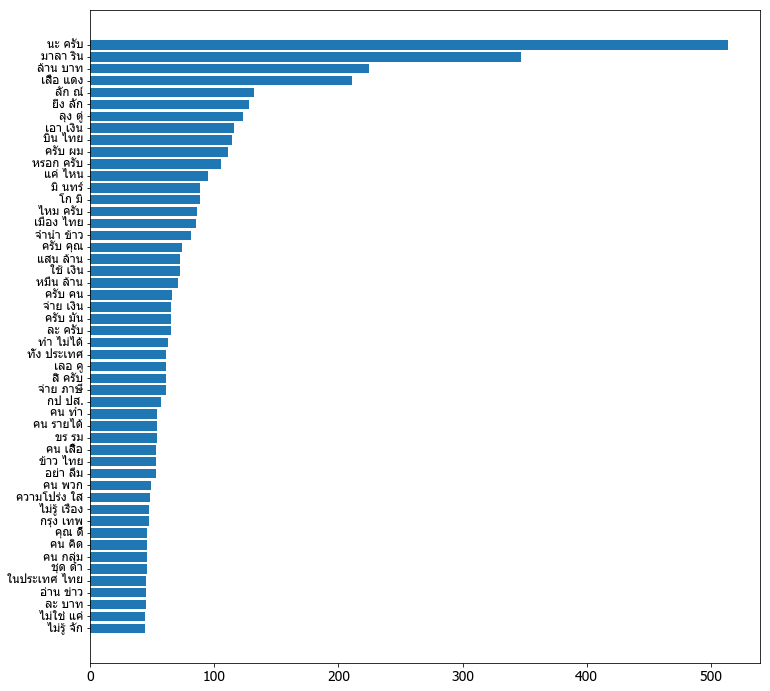

In [207]:
ng = pd.read_excel('C:/Users/chonnakan/Documents/Pantip/clean/bigrams_2017.xlsx')
ng = ng[0:50]
ng = ng[::-1]
matplotlib.rc('font', **{'sans-serif' : 'Tahoma', 'family' : 'sans-serif'})
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
labels = [x for x in ng['word']]
ng1=ax.barh([i for i in range(0, len(ng))], ng['count'], height=.8, align='center')
plt.yticks([i for i in range(0, len(ng))])
ax.set_yticklabels(labels, va='center', minor=False, size=12)
plt.show()